# Recognizing hand-written digits

## This project is modeified from a scikit-learn example authored by Gael Varoquaux, showing how to apply different learning models in scikit-learn package to a given data set. 

With this backend, the output of plotting commands is displayed inline within frontends like the Jupyter notebook, directly below the code cell that produced it. The resulting plots will then also be stored in the notebook document.

In [1]:
%matplotlib inline

In [2]:
# Standard scientific Python imports
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn; seaborn.set()

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

## Digits dataset

The digits dataset consists of 8x8 pixel images of digits. The images attribute of the dataset stores 8x8 arrays of grayscale values for each image. We will use these arrays to visualize the first 4 images. The target attribute of the dataset stores the digit each image represents and this is included in the title of the 4 plots below.

In [3]:
digits = datasets.load_digits()

In [4]:
digits.images

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

In [5]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

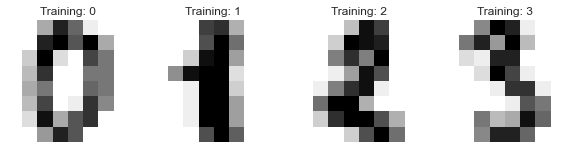

In [6]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

## Classification

To apply a classifier on this data, we need to flatten the images, turning each 2-D array of grayscale values from shape (8, 8) into shape (64,). Subsequently, the entire dataset will be of shape (n_samples, n_features), where n_samples is the number of images and n_features is the total number of pixels in each image.

We can then split the data into train and test subsets and fit a support vector classifier on the train samples. The fitted classifier can subsequently be used to predict the value of the digit for the samples in the test subset.

We will first apply Gaussian naïve Bayes as the starting analysis

In [7]:
from sklearn.naive_bayes import GaussianNB

# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a Gaussian naïve Bayes
clf = GaussianNB()

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

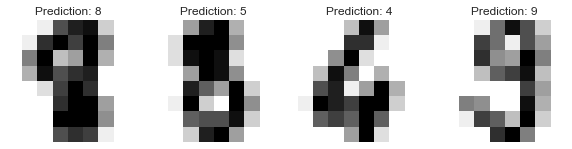

In [8]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')

func:~sklearn.metrics.classification_report builds a text report showing the main classification metrics.

In [9]:
print(f"Classification report for classifier {clf}:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

Classification report for classifier GaussianNB():
              precision    recall  f1-score   support

           0       0.98      0.95      0.97        88
           1       0.81      0.74      0.77        91
           2       0.87      0.84      0.85        86
           3       0.88      0.79      0.83        91
           4       1.00      0.73      0.84        92
           5       0.70      0.81      0.76        91
           6       0.96      0.99      0.97        91
           7       0.65      0.81      0.72        89
           8       0.61      0.76      0.68        88
           9       0.77      0.66      0.71        92

    accuracy                           0.81       899
   macro avg       0.82      0.81      0.81       899
weighted avg       0.82      0.81      0.81       899




We can also plot a confusion matrix <confusion_matrix> of the true digit values and the predicted digit values.

Confusion matrix:
[[84  0  0  0  0  2  0  0  1  1]
 [ 0 67  2  0  0  0  0  2 13  7]
 [ 0  8 72  0  0  1  2  0  3  0]
 [ 0  2  2 72  0  2  0  2  9  2]
 [ 1  0  0  0 67  0  0 22  1  1]
 [ 0  2  0  4  0 74  1  3  2  5]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  2  0  0 12  0 72  2  1]
 [ 0  2  5  0  0  9  0  4 67  1]
 [ 1  1  0  6  0  5  1  6 11 61]]


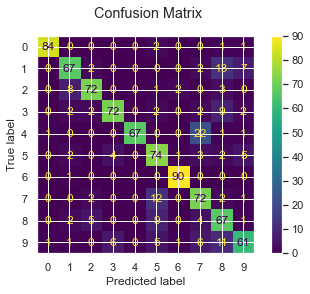

In [10]:
disp = metrics.plot_confusion_matrix(clf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

The weighted avaerage precision is 0.82. According to the confusion matrix, the model is likely to mistake 4 as 7, 1 as 8, 7 as 5, 8 as 5, and 9 as 8. 

We will then try random forest classifier as further analysis and improvement

In [11]:
from sklearn.ensemble import RandomForestClassifier
# Create a classifier: a random forest classifier
clf = RandomForestClassifier(max_depth=15, n_estimators=150, max_features=1)

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

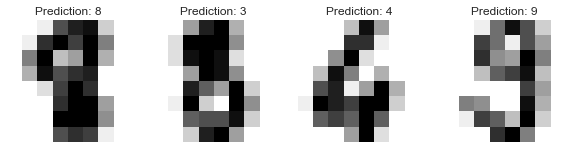

In [12]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')

In [13]:
print(f"Classification report for classifier {clf}:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

Classification report for classifier RandomForestClassifier(max_depth=15, max_features=1, n_estimators=150):
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        88
           1       0.96      0.99      0.97        91
           2       0.98      0.94      0.96        86
           3       0.92      0.88      0.90        91
           4       0.96      0.96      0.96        92
           5       0.86      0.91      0.88        91
           6       0.97      0.99      0.98        91
           7       0.94      0.99      0.96        89
           8       0.91      0.78      0.84        88
           9       0.87      0.90      0.89        92

    accuracy                           0.93       899
   macro avg       0.93      0.93      0.93       899
weighted avg       0.93      0.93      0.93       899




Confusion matrix:
[[86  0  0  0  1  0  1  0  0  0]
 [ 0 90  0  0  0  1  0  0  0  0]
 [ 1  0 81  3  0  0  0  0  0  1]
 [ 1  0  1 80  0  2  0  3  3  1]
 [ 0  0  0  0 88  1  0  1  0  2]
 [ 0  0  0  0  2 83  1  0  0  5]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  3  1  2  1  7  1  1 69  3]
 [ 0  0  0  2  0  2  0  1  4 83]]


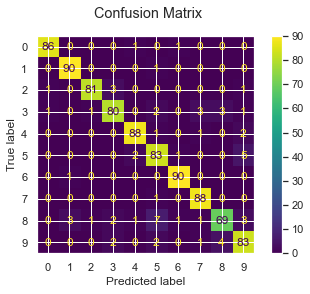

In [14]:
disp = metrics.plot_confusion_matrix(clf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

The weighted avaerage precision is 0.93, as the privious model's prcision is 0.82. The imporvement is vast. According to the confusion matrix, the random forest classifier model is likely to mistake 3 as 5, 5 as 9, 8 as 4, and 8 as 6. Both two models can't classify 5 and 8 well.

The last model is support vector classifier, the example directly from scikit-learn.

In [15]:
# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

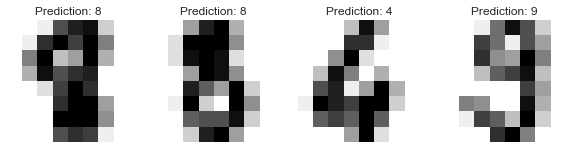

In [16]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')

In [17]:
print(f"Classification report for classifier {clf}:\n"
      ,f"{metrics.classification_report(y_test, predicted)}\n")

Classification report for classifier SVC(gamma=0.001):
               precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899




Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]


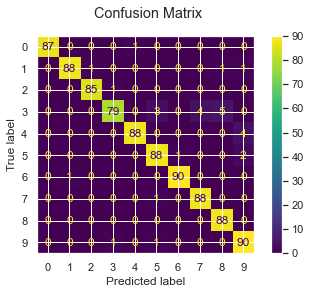

In [18]:
disp = metrics.plot_confusion_matrix(clf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

The weighted avaerage precision is 0.97, better than the preivious two models. According to the confusion matrix, the random forest classifier model is likely to mistake 3 as 7, 3 as 8, and 4 as 9.

Display by graph some misclassified images

In [19]:
wrong_index = np.array(np.where(predicted != y_test))
wrong_index = wrong_index.reshape(len(wrong_index[0]),-1)
wrong_index

array([[ 32],
       [ 53],
       [197],
       [215],
       [220],
       [344],
       [366],
       [390],
       [463],
       [466],
       [653],
       [675],
       [704],
       [705],
       [707],
       [713],
       [730],
       [760],
       [762],
       [764],
       [782],
       [792],
       [814],
       [828],
       [829],
       [831],
       [832],
       [867]])

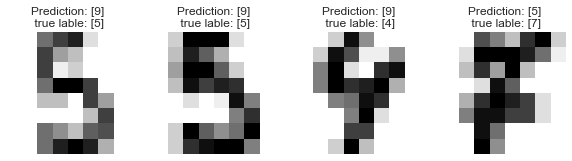

In [20]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, index in zip(axes, wrong_index):
    ax.set_axis_off()
    image = X_test[index].reshape(8, 8)
    prediction = predicted[index]
    ans = y_test[index]
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}\n true lable: {ans}')